In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

DEBUG = False

# Dark theme
plt.style.use('dark_background')

# set grid thickness
plt.rcParams['grid.linewidth'] = 0.3


def print_debug(*args, **kwargs):
    global DEBUG
    if DEBUG:
        print(*args, **kwargs)

# Nacteni dat

In [65]:
DEBUG = True
excel_file = pd.ExcelFile("Projekt-2_Data.xlsx")
print_debug(excel_file.sheet_names)

df_uloha_1: pd.DataFrame = excel_file.parse(excel_file.sheet_names[0])

['Úloha 1', 'Úloha 2']


In [66]:
DEBUG = True
# type(df_uloha_1)
print_debug(df_uloha_1.head(n=10))

   uloha_1 a)  uloha_1 b)_prior  skupina  uloha_1 b)_pozorování
0         2.0          3.634785        0               3.626656
1         2.0          2.868113        0               3.008269
2         1.0          2.149160        0               2.989829
3         3.0          4.263065        0               2.371630
4         0.0          2.594745        0               4.009366
5         1.0          2.592284        0               4.600547
6         1.0          5.021816        0               4.383425
7         3.0          3.129964        0               1.829917
8         2.0          3.850485        0               4.794679
9         2.0          4.483024        0               2.134915


In [67]:
DEBUG = True
df_uloha_2 = excel_file.parse(excel_file.sheet_names[1])
print_debug(df_uloha_2.head())

    OSType  ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]
0      iOS         4113          0.8283        0.1717         47
1      iOS         7549          0.3461        0.6539         46
2  Windows         8855          0.2178        0.7822         55
3  Android         8870          0.0794        0.9206         56
4    MacOS         9559          0.7282        0.2718         76


# ULOHA 1 - Bayesovske odhady

## ULOHA 1.a - Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení [2 body]

In [68]:
connections = 10
time = 5
info_df1 = df_uloha_1['uloha_1 a)']

In [69]:
info_df1.head()

0    2.0
1    2.0
2    1.0
3    3.0
4    0.0
Name: uloha_1 a), dtype: float64

In [70]:
DEBUG = True
# Conjugate apriori distribution
distribution = stats.gamma
alpha = 1
print_debug(f"{alpha=}")
beta = 1
print_debug(f"{beta=}")

# Observed data
observed_data = info_df1.values
print_debug(f"{observed_data=}")

# Get bad values
observed_data[observed_data > time]

alpha=1
beta=1
observed_data=array([ 2.,  2.,  1., ..., nan, nan, nan])


array([], dtype=float64)

### Cleaning data
- Remove outliers

In [71]:
DEBUG = 1
# Extract observed data
observed_data = df_uloha_1['uloha_1 a)'].values
print_debug(f"{observed_data=}")
print_debug(f"{len(observed_data)=}")

# remove nan or +-inf values
observed_data = observed_data[~np.isnan(observed_data)]
print_debug(f"{observed_data=}")
print_debug(f"{len(observed_data)=}")

# Calculate Z-scores
z_scores = stats.zscore(observed_data, nan_policy='raise')
print_debug(f"{z_scores=}")
print_debug(f"{len(observed_data)=}")

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Filter out rows with Z-scores beyond the threshold
filtered_data = observed_data[(np.abs(z_scores) < threshold)]
print_debug(f"{filtered_data=}")
print_debug(f"{len(observed_data)=}")

# Display the number of removed outliers
print_debug(f"Number of removed outliers: {len(df_uloha_1['uloha_1 a)'].values) - len(filtered_data)}")

observed_data=array([ 2.,  2.,  1., ..., nan, nan, nan])
len(observed_data)=100000
observed_data=array([2., 2., 1., 3., 0., 1., 1., 3., 2., 2., 3., 1., 5., 3., 1., 1., 2.,
       1., 1., 1., 2., 3., 2., 0., 3., 1., 2., 1., 5., 1., 0., 0., 2., 1.,
       1., 0., 0., 1., 3., 1., 0., 1., 2., 0., 1., 3., 0., 1., 1., 4., 1.,
       2., 1., 1., 2., 4., 2., 2., 3., 4., 4., 4., 0., 2., 0., 0., 3., 5.,
       1., 2., 1., 0., 1., 1., 4., 1., 1., 3., 0., 1., 2., 2., 2., 3., 1.,
       2., 2., 2., 1., 2., 2., 1., 0., 1., 1., 3., 0., 3., 1., 1.])
len(observed_data)=100
z_scores=array([ 0.27358924,  0.27358924, -0.531085  ,  1.07826349, -1.33575925,
       -0.531085  , -0.531085  ,  1.07826349,  0.27358924,  0.27358924,
        1.07826349, -0.531085  ,  2.68761199,  1.07826349, -0.531085  ,
       -0.531085  ,  0.27358924, -0.531085  , -0.531085  , -0.531085  ,
        0.27358924,  1.07826349,  0.27358924, -1.33575925,  1.07826349,
       -0.531085  ,  0.27358924, -0.531085  ,  2.68761199, -0.531085

## ULOHA 1.a.1 - Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova rozdělení $\lambda$.

lambda_prior=2.0
lambda_posterior=1.6761904761904762


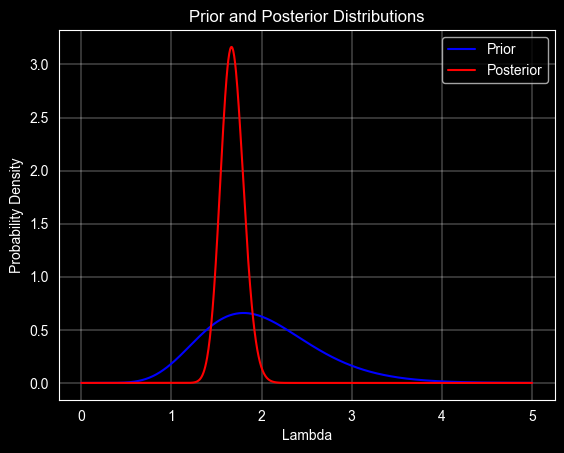

In [72]:
DEBUG = True

# Expertní odhad parametru λ
lambda_expert = 10 / 5  # 10 připojení za 5 ms

# Prior
alpha_prior = 10  # connection count
# alpha_prior = 2
beta_prior = 5  # time within the connection count (alpha_prior) was observed
# beta_prior = 1

# lambda prior
lambda_prior = alpha_prior / beta_prior
print_debug(f"{lambda_prior=}")

# posterior
alpha_posterior = alpha_prior + np.sum(filtered_data)
beta_posterior = beta_prior + len(filtered_data)

# lambda_posterior
lambda_posterior = alpha_posterior / beta_posterior
print_debug(f"{lambda_posterior=}")

# Plot prior and posterior distributions
# x = np.linspace(np.min(filtered_data), np.max(filtered_data), 1000)
x = np.linspace(0, np.max(filtered_data), 1000)
# x = np.linspace(0, 10, 1000)
# x = np.linspace(0, 2 * lambda_expert, 1000)
# plt.figure(figsize=(10, 6))

y = stats.gamma.pdf(x, alpha_prior, scale=1 / beta_prior)
# y = stats.gamma.pdf(x, a=alpha_prior, scale=1/beta_prior)
# y = stats.gamma.pdf(x, alpha_prior, scale=1)
plt.plot(x, y, label='Prior', color='blue')

# Posterior
y = stats.gamma.pdf(x, alpha_posterior, scale=1 / beta_posterior)
# y = stats.gamma.pdf(x, a=alpha_posterior, scale=1/beta_posterior)
# y = stats.gamma.pdf(x, alpha_posterior, scale=1)
plt.plot(x, y, label='Posterior', color='red')

plt.title('Prior and Posterior Distributions')
plt.xlabel('Lambda')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## ULOHA 1.a.2 - Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní $x$ za jeden časový interval.

lambda_prior=2.0
lambda_posterior=1.6761904761904762


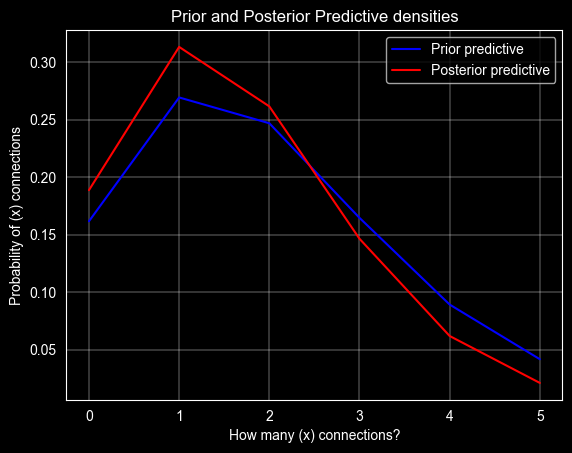

In [73]:
# Bayesian updating
alpha_prior = 10  # connection count
# alpha_prior = 2
beta_prior = 5  # time within the connection count (alpha_prior) was observed
# beta_prior = 1

lambda_prior = alpha_prior / beta_prior
print(f"{lambda_prior=}")

alpha_posterior = alpha_prior + np.sum(filtered_data)  # Assuming filtered_data is defined
beta_posterior = beta_prior + len(filtered_data)

lambda_posterior = alpha_posterior / beta_posterior
print(f"{lambda_posterior=}")

# Plot prior and posterior distributions
# x = np.linspace(0, np.max(filtered_data), 1000)
# print_debug(f"{x=}")
x = range(0, 6)
# x = np.linspace(np.min(filtered_data), np.max(filtered_data), 1000)
# print_debug(f"{x=}")
# plt.figure(figsize=(10, 6))

# Prior predictive density
y = stats.nbinom.pmf(x, alpha_prior, beta_prior / (1 + beta_prior))
plt.plot(x, y, label='Prior predictive', color='blue')

# Posterior predictive density
# y_posterior = stats.nbinom.
y = stats.nbinom.pmf(x, alpha_posterior, beta_posterior / (1 + beta_posterior))
plt.plot(x, y, label='Posterior predictive', color='red')

plt.title('Prior and Posterior Predictive densities')
plt.xlabel('How many (x) connections?')
plt.ylabel('Probability of (x) connections')
plt.legend()
plt.show()

In [74]:
# Task 3: Construct 95% confidence intervals for λ from prior and posterior distributions
prior_ci = stats.gamma.interval(0.95, alpha_prior, scale=1 / beta_prior)
posterior_ci = stats.gamma.interval(0.95, alpha_posterior, scale=1 / beta_posterior)

print(f"Prior 95% CI for λ: {prior_ci[0]:.5f}, {prior_ci[1]:.5f}")
print(f"Posterior 95% CI for λ: {posterior_ci[0]:.5f}, {posterior_ci[1]:.5f}")


Prior 95% CI for λ: 0.95908, 3.41696
Posterior 95% CI for λ: 1.43769, 1.93272


In [75]:
# Task 4: Select two posterior point estimates for λ and compare them
posterior_mean = alpha_posterior / beta_posterior
posterior_mode = (alpha_posterior - 1) / beta_posterior

print(f"Aposteriori mean: {posterior_mean:.5f}")
print(f"Aposteriori mode: {posterior_mode:.5f}")


Aposteriori mean: 1.67619
Aposteriori mode: 1.66667


In [76]:
# Task 5: Select one prior and one posterior point estimate for the number of observations
mu_prior = alpha_prior / beta_prior
mu_posterior = alpha_posterior / beta_posterior

print(f"Prior estimate: {mu_prior:.5f}")
print(f"Posterior estimate: {mu_posterior:.5f}")

Prior estimate: 2.00000
Posterior estimate: 1.67619


## ULOHA 1.b - Aproximace diskrétním rozdělením [2 body]

### Load data

In [77]:
DEBUG = 1
# Extract relevant columns
prior_data = df_uloha_1['uloha_1 b)_prior']
observed_data = df_uloha_1['uloha_1 b)_pozorování']
group_column = df_uloha_1['skupina']
print_debug(f"{prior_data=}")
print()
print_debug(f"{observed_data=}")
print()
print_debug(f"{group_column=}")
print()


prior_data=0        3.634785
1        2.868113
2        2.149160
3        4.263065
4        2.594745
           ...   
99995    1.725637
99996    4.048414
99997    3.000662
99998    3.058451
99999    4.487418
Name: uloha_1 b)_prior, Length: 100000, dtype: float64

observed_data=0        3.626656
1        3.008269
2        2.989829
3        2.371630
4        4.009366
           ...   
99995         NaN
99996         NaN
99997         NaN
99998         NaN
99999         NaN
Name: uloha_1 b)_pozorování, Length: 100000, dtype: float64

group_column=0           0
1           0
2           0
3           0
4           0
         ... 
99995    9999
99996    9999
99997    9999
99998    9999
99999    9999
Name: skupina, Length: 100000, dtype: int64


### Filter out bad values

In [85]:
DEBUG = 1

#Filter inf and nan values
prior_data = prior_data[~np.isnan(prior_data)]
observed_data = observed_data[~np.isnan(observed_data)]
group_column = group_column[~np.isnan(group_column)]
print_debug(f"{prior_data=}")
print_debug(f"{len(prior_data)=}")
print()
print_debug(f"{observed_data=}")
print_debug(f"{len(observed_data)=}")
print()
print_debug(f"{group_column=}")
print_debug(f"{len(group_column)=}")
print()

prior_data=0        3.634785
1        2.868113
2        2.149160
3        4.263065
4        2.594745
           ...   
99995    1.725637
99996    4.048414
99997    3.000662
99998    3.058451
99999    4.487418
Name: uloha_1 b)_prior, Length: 100000, dtype: float64
len(prior_data)=100000

observed_data=0     3.626656
1     3.008269
2     2.989829
3     2.371630
4     4.009366
        ...   
95    3.438933
96    3.430973
97    3.727306
98    4.257909
99    2.081679
Name: uloha_1 b)_pozorování, Length: 100, dtype: float64
len(observed_data)=100

group_column=0           0
1           0
2           0
3           0
4           0
         ... 
99995    9999
99996    9999
99997    9999
99998    9999
99999    9999
Name: skupina, Length: 100000, dtype: int64
len(group_column)=100000


### Uloha 1.b.1: Plot prior, posterior, and likelihood functions

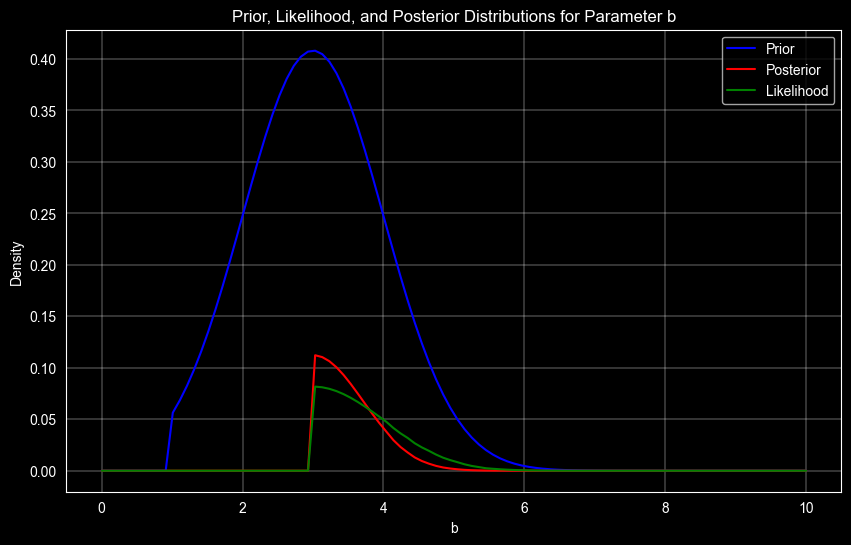

In [92]:
# parameters for prior distribution
mu = 3
sigma = 1
a = 1

# Prior distribution
b_values = np.linspace(0, 10, 100)
alpha = (a - mu) / sigma
prior_distribution = stats.truncnorm.pdf(b_values, a=alpha, b=np.inf, loc=mu, scale=sigma)

# Likelihood function
likelihood_values = np.zeros_like(b_values)

alpha = (a - 1) / sigma
for obs in observed_data:
    likelihood_values += stats.truncnorm.pdf(b_values, a=alpha, b=obs, loc=mu, scale=sigma)

# Normalize likelihood for comparability
likelihood_values /= np.sum(likelihood_values)

# Bayes rule
posterior_distribution = prior_distribution * likelihood_values
posterior_distribution /= np.sum(posterior_distribution)

plt.figure(figsize=(10, 6))
plt.plot(b_values, prior_distribution, label='Prior', color='blue')
plt.plot(b_values, posterior_distribution, label='Posterior', color='red')
plt.plot(b_values, likelihood_values, label='Likelihood', color='green')
# plt.hist(prior_data, bins=20, density=True, alpha=0.5, color='blue', label='Apriorní hustota')
# plt.hist(observed_data, bins=20, density=True, alpha=0.5, color='green', label='Funkce věrohodnosti')
# plt.hist(b_values, bins=20, density=True, weights=posterior_distribution, alpha=0.5, color='red', label='Aposteroriorní hustota')

plt.title('Prior, Likelihood, and Posterior Distributions for Parameter b')
plt.xlabel('b')
plt.ylabel('Density')
plt.legend()
plt.show()

In [81]:
# Určení 95% intervalu spolehlivosti
cumulative_posterior = np.cumsum(posterior_distribution)
lower_bound = b_values[np.argmax(cumulative_posterior >= 0.025)]
upper_bound = b_values[np.argmax(cumulative_posterior >= 0.975)]
print(f'95% Confidence Interval for Parameter b: {lower_bound:.5f}, {upper_bound:.5f}')


95% Confidence Interval for Parameter b: 1.61616, 4.34343


In [82]:
# Vybrání dvou bodových odhadů
point_estimate_1 = np.sum(b_values * posterior_distribution)
point_estimate_2 = b_values[np.argmax(posterior_distribution)]
print(f'First point estimate: {point_estimate_1}')
print(f'Second point estimate: {point_estimate_2}')


First point estimate: 2.9985902274579974
Second point estimate: 3.0303030303030303


In [ ]:
DEBUG = 1
mu = 3
sigma_squared = 1
a = 1

# Prior distribution parameters
b_values = np.linspace(start=0, stop=10, num=100)
print_debug(f"{b_values=}")
print_debug(f"{len(b_values)=}")
print()

prior_values = stats.truncnorm.pdf(b_values, (a - mu) / np.sqrt(sigma_squared), np.inf, loc=mu,
                                   scale=np.sqrt(sigma_squared))

# Likelihood function
likelihood_values = np.zeros_like(b_values)
print_debug(f"{likelihood_values=}")
print_debug(f"{len(likelihood_values)=}")
print()

group = df_uloha_1['skupina'].unique()[0]
print_debug(f"{group=}")
print()

group_observed_data = observed_data[group_column == group]
print_debug(f"{group_observed_data=}")
print_debug(f"{len(group_observed_data)=}")
print()

hist = np.histogram(group_observed_data, bins=b_values, density=True)[0]
print_debug(f"{hist=}")
print_debug(f"{len(hist)=}")


In [ ]:
for group in df_uloha_1['skupina'].unique():
    group_observed_data = observed_data[group_column == group]
    likelihood_values += np.histogram(group_observed_data, bins=len(b_values), density=True)[0] / len(
        df_uloha_1[df_uloha_1['skupina'] == group])
print_debug(f"{likelihood_values=}")
print_debug(f"{len(likelihood_values)=}")

In [ ]:
# Normalize likelihood for comparability
likelihood_values /= np.sum(likelihood_values)

# Posterior distribution parameters
posterior_values = prior_values * likelihood_values
print_debug(f"{posterior_values=}")
posterior_values /= np.sum(posterior_values)
print_debug(f"{posterior_values=}")

# Plot prior, posterior, and likelihood functions
plt.figure(figsize=(10, 6))
plt.plot(b_values, prior_values, label='Prior', color='blue')
plt.plot(b_values, likelihood_values, label='Likelihood', color='green')
plt.plot(b_values, posterior_values, label='Posterior', color='orange')
plt.title('Prior, Likelihood, and Posterior Distributions for Parameter b')
plt.xlabel('b')
plt.ylabel('Density')
plt.legend()
plt.show()

### Uloha 1.b.2: Determine 95% confidence interval for parameter b from the posterior distribution

In [ ]:
DEBUG = 1

posterior_percentiles = np.percentile(b_values, [2.5, 97.5], weights=posterior_values)
print_debug(f"95% Confidence Interval for Parameter b: {posterior_percentiles=}")

### Uloha 1.b.3: Select two point estimates for parameter b and calculate them

In [ ]:
DEBUG = 1
posterior_mean = np.sum(b_values * posterior_values)
posterior_mode = b_values[np.argmax(posterior_values)]

print_debug(f"{posterior_mean=}")
print_debug(f"{posterior_mode=}")

In [ ]:
# Načtení dat
data = pd.read_csv('Data_v1.0.csv')

# Přidání kvadratických termínů
data['ActiveUsers_squared'] = data['ActiveUsers'] ** 2
data['InteractingPct_squared'] = data['InteractingPct'] ** 2
data['ScrollingPct_squared'] = data['ScrollingPct'] ** 2

# Přidání interakcí druhého řádu
data['ActiveUsers_InteractingPct'] = data['ActiveUsers'] * data['InteractingPct']
data['ActiveUsers_ScrollingPct'] = data['ActiveUsers'] * data['ScrollingPct']
data['InteractingPct_ScrollingPct'] = data['InteractingPct'] * data['ScrollingPct']

# Plný kvadratický model
model_formula = 'ping ~ ActiveUsers + InteractingPct + ScrollingPct + ActiveUsers_squared + InteractingPct_squared + ScrollingPct_squared + ActiveUsers_InteractingPct + ActiveUsers_ScrollingPct + InteractingPct_ScrollingPct + OSType'

# Fit regresního modelu
model = sm.OLS.from_formula(model_formula, data=data)
results = model.fit()

# Výpis výsledků
print(results.summary())

# Regresní diagnostika
sns.residplot(x=results.fittedvalues, y=results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Test normality reziduí
sm.qqplot(results.resid, line='s')
plt.title('Normal Q-Q plot')
plt.show()

# VIF pro detekci multicollinearity
X = data[['ActiveUsers', 'InteractingPct', 'ScrollingPct', 'ActiveUsers_squared', 'InteractingPct_squared',
          'ScrollingPct_squared', 'ActiveUsers_InteractingPct', 'ActiveUsers_ScrollingPct',
          'InteractingPct_ScrollingPct']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Identifikace odlehlých hodnot
influence = results.get_influence()
leverage = influence.hat_matrix_diag
residuals_studentized = influence.resid_studentized_internal
outliers = np.where((np.abs(residuals_studentized) > 2) | (leverage > 0.02))

# Vyhodnocení výsledků a rozhodnutí o odstranění odlehlých hodnot (pokud je to nutné)

# Analýza parametrů
param_analysis = results.params

# Identifikace nejproblematičtější hodnoty
max_residual = data.loc[outliers[0], 'ping'].max()

# Odhad odezvy uživatele s Windows
windows_user = pd.DataFrame({'ActiveUsers': [data['ActiveUsers'].mean()],
                             'InteractingPct': [data['InteractingPct'].mean()],
                             'ScrollingPct': [data['ScrollingPct'].mean()],
                             'ActiveUsers_squared': [data['ActiveUsers_squared'].mean()],
                             'InteractingPct_squared': [data['InteractingPct_squared'].mean()],
                             'ScrollingPct_squared': [data['ScrollingPct_squared'].mean()],
                             'ActiveUsers_InteractingPct': [data['ActiveUsers_InteractingPct'].mean()],
                             'ActiveUsers_ScrollingPct': [data['ActiveUsers_ScrollingPct'].mean()],
                             'InteractingPct_ScrollingPct': [data['InteractingPct_ScrollingPct'].mean()],
                             'OSType': ['Windows']})
predicted_ping = results.predict(windows_user)

# Konfidenční interval a predikční interval
conf_interval = results.get_prediction(windows_user).conf_int()
pred_interval = results.get_prediction(windows_user).conf_int(obs=True)

# Vyhodnocení modelu pro další použití
# Zde můžete diskutovat o tom, zda jsou výsledky modelu uspokojivé a zdali je model vhodný pro další použití.
